In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def collect_losses(root_dir):
    # return a dict of dict of list. "finetuned" -> lang" -> { "notpretraining" : {"layer" : [], } , "pretraining" : {"layer" : []}}
    
    langs = ["en", "it", "sp", "ge"]
    
    layers = 12
    
    collected_losses = dict()
    
    for finetuned in ["finetuned", "notfinetuned"]:
        collected_losses[finetuned] = dict()
        for lang in langs:
            collected_losses[finetuned][lang] = dict()
            collected_losses[finetuned][lang]["notpretraining"] = dict()
            collected_losses[finetuned][lang]["pretraining"] = dict()
            collected_losses[finetuned][lang]["notpretraining_dur"] = dict()
            collected_losses[finetuned][lang]["pretraining_dur"] = dict()
            collected_losses[finetuned][lang]["notpretraining_prob_skip"] = dict()
            collected_losses[finetuned][lang]["pretraining_prob_skip"] = dict()
            for l in range(layers):
                collected_losses[finetuned][lang]["notpretraining"][l] = list()
                collected_losses[finetuned][lang]["pretraining"][l] = list()
                collected_losses[finetuned][lang]["notpretraining_dur"][l] = list()
                collected_losses[finetuned][lang]["pretraining_dur"][l] = list()
                collected_losses[finetuned][lang]["notpretraining_prob_skip"][l] = list()
                collected_losses[finetuned][lang]["pretraining_prob_skip"][l] = list()

    depth = 1

    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) == depth:
            for file_ in files:
                if file_ == "probe_results.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                               
                        name_splitted = subdir.split("_")
                        
                        if "dur" in name_splitted:
                            if len(name_splitted) == 3: # not finetuned
                                finetuned = "notfinetuned"
                            else:
                                finetuned = "finetuned"
                            pretrain = name_splitted[0].split(os.sep)[-1] + "_dur"
                        elif "skip" in name_splitted:
                            if len(name_splitted) == 4: # not finetuned
                                finetuned = "notfinetuned"
                            else:
                                finetuned = "finetuned"
                            pretrain = name_splitted[0].split(os.sep)[-1] + "_prob_skip"
                        else:
                            if len(name_splitted) == 2: # not finetuned
                                finetuned = "notfinetuned"
                            else:
                                finetuned = "finetuned"
                            pretrain = name_splitted[0].split(os.sep)[-1]

                        lang = name_splitted[-1]
                        
                        for l in range(layers):
                            collected_losses[finetuned][lang][pretrain][l] = d[str(l)]["score_test"][1:]
                
                
    return(collected_losses)

In [3]:
def collect_mean_baseline(root_dir):
    dict_res_mae = dict()
    dict_res_mse = dict()

    for subdir, dirs, files in os.walk(root_dir):
        for file_ in files:
            with open(subdir + "/" + file_) as f:
                d = json.load(f)
                dict_res_mae[file_.split(".")[0]] = dict()
                dict_res_mse[file_.split(".")[0]] = dict()
                
                for k, v in d.items():
                    if "mae" in k:
                        dict_res_mae[file_.split(".")[0]][k] = v
                    else:
                        dict_res_mse[file_.split(".")[0]][k] = v
                

    return dict_res_mae, dict_res_mse

In [4]:
baseline_mae, _ = collect_mean_baseline("../mean_baseline")

In [5]:
collected_losses = collect_losses("../probing")

# ALL FEATURES

## Not Finetuned

### EN

In [6]:
en_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["en"]["notpretraining"])
en_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["en"]["pretraining"])

In [7]:
en_notpretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,15.478631,15.912011,16.068237,16.293395,16.401606,16.408157,16.640814,16.948940,17.178368,17.170456,17.810474,17.557088
1,13.369519,13.745314,13.700137,14.179482,14.022397,14.056654,14.231530,14.348719,14.581093,14.574644,15.161376,14.926985
2,6.924386,7.035086,7.110748,7.172541,7.159906,7.261325,7.245699,7.340273,7.454742,7.445845,7.675123,7.662610
3,6.433231,6.513019,6.546858,6.535177,6.558957,6.635274,6.627276,6.746506,6.855772,6.832222,6.942459,6.995819
4,7.064490,7.185610,7.274052,7.267489,7.316220,7.413759,7.409145,7.559237,7.648400,7.672248,7.859564,7.827546
5,6.889440,6.993234,7.013699,6.939242,6.993676,7.068038,7.092172,7.263931,7.362982,7.384496,7.467708,7.494383
6,12.132348,12.240615,12.283059,12.235302,12.291742,12.384777,12.333255,12.592487,12.815316,12.946854,13.061828,13.049293
7,12.760345,12.876868,12.930402,12.786132,12.783718,12.958953,12.982871,13.374790,13.264519,13.407881,13.403690,13.540567


In [8]:
en_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,12.381046,13.653558,12.350008,11.633682,11.635862,11.858666,11.850582,12.062326,12.514308,12.178501,12.230617,12.199561
1,11.315796,12.479911,11.263882,10.573028,10.645904,10.694243,10.602208,10.899603,11.213035,10.820588,10.845208,10.640970
2,5.720784,6.310493,5.382499,5.295207,5.304693,5.208209,5.150856,5.329335,5.439605,5.282667,5.347796,5.226701
3,5.507468,5.903705,5.121170,4.981358,4.941877,4.973035,4.836100,4.935888,5.104003,4.930140,5.031100,4.894854
4,5.704656,6.286206,5.390378,5.264575,5.224717,5.199416,5.227494,5.276460,5.416054,5.341991,5.451360,5.350500
5,5.921828,6.299488,5.464534,5.348275,5.267171,5.311488,5.198028,5.265620,5.424557,5.310936,5.449099,5.326525
6,9.691315,10.379936,9.467161,8.939679,8.938399,8.977876,9.119692,9.187629,9.130090,9.170587,9.415158,8.938360
7,12.072328,12.544129,11.533609,11.143550,10.955728,11.237743,11.085086,11.216845,11.611804,11.185636,11.488364,11.391148


### IT

In [9]:
it_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["it"]["notpretraining"])
it_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["it"]["pretraining"])

In [10]:
it_notpretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,19.014121,19.375780,19.133176,19.099057,19.713221,19.809447,20.004389,20.530643,20.907275,21.041892,21.416160,21.766192
1,14.328656,14.575017,14.299506,14.681901,14.859108,14.929526,14.931123,15.352422,15.577338,15.637272,15.750642,15.777186
2,7.029598,7.203721,7.101541,7.104797,7.271433,7.265472,7.321074,7.474889,7.647993,7.637578,7.738627,7.773360
3,6.076760,6.239086,6.185446,6.277088,6.395158,6.425209,6.477394,6.666533,6.810138,6.921651,6.947809,6.830740
4,6.838860,6.928194,6.821508,6.794613,6.978747,7.002877,7.031458,7.263632,7.401628,7.353314,7.529968,7.588131
5,6.626444,6.794435,6.741417,6.788784,6.943274,6.993997,6.980941,7.205689,7.365881,7.469946,7.531203,7.460534
6,19.740734,19.642004,19.458497,19.324914,19.873912,20.083155,20.153305,20.355994,20.865986,20.955602,21.297733,20.909600
7,17.272788,17.182234,17.594175,17.524178,17.841083,17.908866,17.794497,18.357546,18.539880,18.991986,19.074682,18.885988


In [11]:
it_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,14.933971,16.207783,15.530682,15.463146,15.043956,15.449000,15.329822,15.417057,15.515146,15.651090,15.437329,15.346670
1,12.116430,13.082050,11.997263,11.979375,12.114921,12.095345,12.121027,12.077720,12.018803,12.271010,12.168366,11.870547
2,5.809971,6.377515,5.828891,5.907023,5.587639,5.663272,5.816882,5.754154,5.698819,5.910120,5.906192,5.881562
3,5.090249,5.678410,5.260850,5.057676,4.904493,4.905742,5.054554,5.069298,5.002173,5.148214,5.209865,5.068056
4,5.559853,6.035854,5.645562,5.548395,5.397513,5.489536,5.565801,5.584571,5.580568,5.713179,5.686541,5.653768
5,5.656291,6.260876,5.754519,5.462481,5.327049,5.287976,5.518608,5.493859,5.453078,5.531474,5.530672,5.428869
6,16.786911,17.601328,16.278827,15.358981,15.445006,15.543173,15.889159,16.466983,16.259523,16.676020,16.543182,16.095861
7,16.850227,17.556384,17.289198,16.468456,15.655391,15.348523,15.765363,16.117083,15.721063,16.004698,15.936262,15.564274


### SP

In [12]:
sp_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["sp"]["notpretraining"])
sp_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["sp"]["pretraining"])

In [13]:
sp_notpretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,17.968672,17.951448,18.362260,18.366827,18.547595,18.948057,19.176208,19.316596,19.600899,20.140302,20.346298,20.403339
1,12.917463,12.882501,12.959568,12.930331,13.172109,13.376910,13.348676,13.297255,13.427584,13.830341,14.114925,14.040082
2,8.925276,8.892752,9.105442,9.113982,9.206861,9.524057,9.441603,9.425911,9.588855,9.889326,9.947025,10.014667
3,9.386856,9.522346,9.702836,9.700951,9.887628,10.002319,9.993026,10.067023,10.127824,10.314219,10.447715,10.658704
4,9.382891,9.338478,9.557865,9.566335,9.625480,9.969132,9.993118,10.027231,10.246935,10.574974,10.536632,10.794328
5,11.196251,11.297576,11.474917,11.540824,11.645041,11.889945,11.944293,12.011432,12.101546,12.299783,12.402337,12.659868
6,15.446026,15.432403,15.574552,15.444773,15.690812,15.924739,16.030678,16.001230,16.192369,16.350617,16.368430,16.683156
7,17.192064,17.301278,17.201641,17.263585,17.496435,17.654636,17.722777,17.817747,17.741840,17.778775,17.992246,18.276352


In [14]:
sp_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,14.207301,15.170341,14.108237,13.828539,13.841052,14.078522,13.932073,14.373553,14.201798,13.999659,14.021617,13.864885
1,10.873565,11.465228,10.664373,10.138884,10.275333,10.327958,10.302015,10.429679,10.386417,10.417372,10.476184,10.292387
2,7.834233,7.861506,6.958485,6.779341,6.610032,6.808727,6.987438,6.982969,7.027200,6.892237,7.047088,6.816773
3,8.044617,8.442084,7.336721,7.115867,7.053595,7.122440,7.210083,7.300705,7.182059,7.209481,7.277675,7.013335
4,8.128784,8.217457,7.205162,7.061456,6.854393,7.030724,7.124562,7.170985,7.245031,7.140206,7.227619,7.076527
5,9.459492,9.774942,8.698657,8.352351,8.288089,8.161658,8.319506,8.460531,8.484382,8.474766,8.544598,8.329843
6,13.285652,13.124562,12.308424,11.944072,11.459679,11.396445,12.149954,12.283591,12.318892,11.985159,12.343054,12.030229
7,15.231234,16.239519,14.778505,14.578095,14.530580,14.179995,14.346864,14.434276,14.735852,14.677237,14.322650,14.339467


### GE

In [15]:
ge_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["ge"]["notpretraining"])
ge_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["ge"]["pretraining"])

In [16]:
ge_notpretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,16.729470,16.550630,16.504074,16.695290,16.627312,16.508019,16.938889,17.025280,17.624308,17.864021,17.976276,18.036758
1,12.129353,12.093498,12.254596,12.246519,12.162748,12.151663,12.520497,12.466890,12.635281,12.703445,12.749667,12.642468
2,6.925968,7.012521,7.011261,6.979635,6.991755,6.980511,7.019872,7.100155,7.097369,7.282389,7.294862,7.334832
3,7.778607,7.750393,7.755627,7.811318,7.884993,7.746955,7.814158,7.885915,7.906309,8.106051,8.094833,8.205392
4,7.050530,7.138979,7.094073,7.074273,7.129263,7.210081,7.255230,7.321291,7.292359,7.493668,7.543805,7.676072
5,8.061471,8.089669,8.067514,8.089027,8.216233,8.073134,8.173993,8.296257,8.252483,8.420433,8.475654,8.643420
6,20.389709,20.673104,21.037305,20.791882,20.998331,21.243693,21.273486,21.646243,21.408645,21.961334,21.811349,22.388186
7,17.726136,17.249100,16.904377,17.150520,17.106624,17.079196,17.474268,17.376472,17.244052,17.492707,17.662377,17.853008


In [17]:
ge_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,12.627565,14.087537,13.377135,12.888556,12.620435,12.755731,12.929654,12.934078,13.305485,13.435558,12.889373,13.068403
1,10.440292,10.857218,10.611795,10.318103,9.874492,10.114196,10.146357,10.214141,10.376477,10.216358,10.040635,9.827117
2,5.847098,6.256131,5.552794,5.340820,5.084677,5.052088,5.072934,5.035656,5.077926,5.071252,5.147474,5.105327
3,6.421386,7.091815,6.312678,6.144267,5.802538,5.719645,5.736747,5.674318,5.735311,5.791463,5.909751,5.906858
4,5.825981,6.364792,5.514612,5.207652,5.078029,4.940420,4.986137,4.939374,4.937985,4.987325,5.014386,5.019607
5,6.545924,7.318457,6.478487,6.203273,5.942476,5.816873,5.882359,5.790973,5.823401,5.915560,6.065207,6.052013
6,16.715119,18.377953,15.232324,14.361594,14.223392,14.016537,13.961623,14.072857,14.008153,14.269469,14.274441,14.086446
7,16.119153,17.318958,16.619015,16.618327,16.056540,15.634349,16.033846,15.834300,16.150877,16.222750,15.924369,16.147591


## Fine-tuned

### EN

In [18]:
en_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["en"]["notpretraining"])
en_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["en"]["pretraining"])

In [19]:
en_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,12.882214,11.767771,10.689587,9.766459,9.013335,7.977049,7.348838,7.073666,6.695885,6.333368,6.115005,5.914486
1,12.338640,11.073628,10.341228,9.820272,9.356384,8.784889,8.292733,7.863288,7.431589,7.111345,6.856212,6.622080
2,5.804643,4.943232,4.547930,4.298235,4.262696,4.180578,4.032711,3.818123,3.593893,3.399625,3.257088,3.110026
3,5.692462,4.757372,4.277090,4.004212,3.872226,3.746045,3.575788,3.480730,3.258228,3.073281,2.890661,2.755435
4,5.594431,4.765786,4.363354,3.995213,3.847239,3.659361,3.554241,3.390346,3.163041,3.004000,2.866970,2.746519
5,6.021105,5.030814,4.520337,4.194121,4.024892,3.804175,3.670261,3.558098,3.324060,3.120779,2.936661,2.796375
6,10.217179,8.975369,8.394434,7.752952,7.375059,6.994113,6.756533,6.441355,6.020031,5.707506,5.423479,5.202446
7,13.052234,11.729662,10.732966,10.299085,9.959801,9.632408,9.471663,9.119962,8.604920,8.119807,7.783213,7.476181


In [20]:
en_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,12.354212,12.629576,9.986162,7.402772,4.856234,3.807632,3.470171,3.309508,3.112620,2.983849,2.929492,2.881122
1,11.299703,11.881596,9.740057,7.837150,6.421304,5.851593,5.502176,5.191483,4.948385,4.710246,4.614556,4.565796
2,5.714359,5.945633,4.755314,3.897350,3.334634,2.972799,2.758684,2.573348,2.439320,2.307555,2.256724,2.203328
3,5.492229,5.473697,4.295205,3.680683,3.068611,2.601227,2.353559,2.174251,2.094571,1.902710,1.854177,1.799246
4,5.692673,5.868808,4.547086,3.576166,2.811981,2.386220,2.151511,2.043708,1.955198,1.831629,1.763699,1.713523
5,5.898162,5.858251,4.489467,3.804578,3.010429,2.471336,2.171839,2.050222,1.953920,1.750523,1.713955,1.655229
6,9.656318,9.994973,8.530780,7.647563,6.929417,5.901502,5.466405,5.185800,4.907663,4.657608,4.567109,4.485797
7,12.021166,11.775766,9.997043,9.245427,8.419297,7.514920,7.192883,6.936089,6.596845,6.248457,6.149455,6.103156


### IT

In [21]:
it_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["it"]["notpretraining"])
it_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["it"]["pretraining"])

In [22]:
it_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,16.586539,15.490966,14.458411,13.330444,11.964282,10.692521,9.999239,9.593389,9.141550,8.656049,8.306934,8.055300
1,14.985812,13.055291,11.994429,11.611663,10.842631,10.114499,9.682364,9.139269,8.944403,8.560417,8.277508,8.030359
2,6.676140,5.915155,5.389210,5.246790,5.059292,4.893372,4.699895,4.435103,4.258877,4.000542,3.752825,3.551495
3,6.168484,5.020047,4.760978,4.702463,4.534354,4.369305,4.248658,4.171717,3.892563,3.608388,3.331757,3.123582
4,5.966605,5.359862,4.857329,4.611423,4.452797,4.350286,4.186208,3.958412,3.722849,3.472494,3.233758,3.035525
5,6.495707,5.279216,4.958013,4.769730,4.536568,4.429673,4.350635,4.178077,3.881853,3.580926,3.302273,3.117265
6,16.428694,15.074544,14.293079,13.315669,12.160337,11.597093,11.132074,10.579526,10.075518,9.467833,8.920410,8.491151
7,20.203733,17.262617,16.151364,15.605066,14.981724,14.437095,13.762554,13.393896,12.649764,12.032792,11.408528,10.971557


In [23]:
it_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,14.886954,16.139486,11.600941,8.565628,6.726474,6.329119,5.853598,5.610914,5.080353,4.917744,4.762781,4.722224
1,12.095344,12.867530,10.112496,9.090084,8.227375,8.195292,7.917370,7.451519,6.892757,6.436367,6.191551,6.154745
2,5.788440,6.236897,5.115539,4.580688,4.457305,4.235509,4.008416,3.676378,3.331659,3.074571,2.927941,2.864194
3,5.070805,5.555692,4.719574,4.218058,4.035988,3.787431,3.595550,3.326786,2.903003,2.681638,2.527030,2.471870
4,5.541758,5.979101,4.768049,4.047540,3.821299,3.488029,3.278479,2.880223,2.567292,2.336690,2.212086,2.153376
5,5.634823,6.064066,4.982657,4.320014,4.058921,3.701625,3.419604,3.157942,2.726674,2.488711,2.367038,2.304825
6,16.742088,17.298624,15.085510,12.940634,12.438358,11.307827,10.593208,9.332485,7.970291,7.485130,7.252350,7.106643
7,16.833377,16.790417,15.563102,14.233689,13.584581,13.156815,12.333474,11.823988,11.027475,10.407115,10.415345,10.343022


### SP

In [24]:
sp_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["sp"]["notpretraining"])
sp_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["sp"]["pretraining"])

In [25]:
sp_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,16.124585,15.091708,13.328827,11.959818,10.705578,9.819623,9.225761,8.858999,8.483878,8.175295,7.798833,7.534134
1,12.457747,11.361707,10.378419,9.701014,9.159937,8.776192,8.330677,8.006128,7.794022,7.507531,7.227802,6.942252
2,8.270133,7.435077,6.749063,6.558823,6.412954,6.236598,6.117751,5.829751,5.539092,5.259339,4.978739,4.765070
3,8.439219,7.451262,6.894646,6.661160,6.412178,6.411077,6.178614,5.958934,5.685775,5.352121,5.010820,4.789729
4,8.143970,7.315942,6.468196,6.177927,5.939806,5.742232,5.628651,5.350520,5.095687,4.844746,4.579037,4.414439
5,9.862396,8.583364,7.943303,7.606383,7.234078,7.157255,6.921342,6.645639,6.299852,5.924851,5.550879,5.321997
6,13.443966,12.252592,11.831648,11.498827,10.844046,10.708611,10.241039,9.763681,9.328186,8.825713,8.299195,7.959664
7,17.492793,15.741377,14.594511,14.024906,13.349386,13.316957,12.783427,12.256736,11.665861,11.164235,10.684605,10.359823


In [26]:
sp_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,14.164062,14.731870,12.150011,9.547328,7.293919,5.762781,5.251554,5.003257,4.723392,4.412450,4.246272,4.183106
1,10.861764,11.252604,9.484847,8.321233,7.399443,6.757338,6.413689,6.190547,5.898474,5.551295,5.408429,5.292205
2,7.819520,7.763849,6.489055,5.747141,5.179957,4.961578,4.783948,4.455828,4.229403,3.911906,3.763644,3.694071
3,8.026320,8.177253,6.980020,5.990378,5.548113,5.136330,5.199035,4.763555,4.366060,3.877379,3.697706,3.637718
4,8.099306,7.963811,6.423606,5.502287,4.805086,4.409043,4.224047,3.982108,3.621029,3.347199,3.212112,3.175234
5,9.430741,9.501048,8.126466,6.838900,6.209168,5.655854,5.702047,5.225722,4.691753,4.145761,3.931378,3.856518
6,13.253732,12.759079,11.705989,10.879772,10.399879,10.226676,9.895396,9.258822,8.321269,7.502684,7.286110,7.180141
7,15.212906,15.798523,14.430695,12.503265,12.107548,11.567580,11.203580,10.475511,10.052290,9.417229,9.233278,9.068467


### GE

In [27]:
ge_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["ge"]["notpretraining"])
ge_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["ge"]["pretraining"])

In [28]:
ge_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,14.073256,13.245599,11.949861,10.632319,9.609936,8.461241,7.768999,7.386610,6.893519,6.538819,6.233862,6.006483
1,12.835441,11.249448,10.583370,9.633136,9.218048,8.463743,8.161885,7.689727,7.401510,6.998200,6.735441,6.467692
2,6.375921,5.658026,5.282668,5.004155,4.887357,4.817588,4.670503,4.404995,3.950085,3.646382,3.426913,3.202657
3,7.129044,6.378570,5.820389,5.461206,5.358237,5.284559,5.146805,4.858637,4.407851,4.057959,3.748230,3.490541
4,5.769060,5.345437,4.850656,4.556576,4.376040,4.288753,4.142727,3.945907,3.492826,3.192374,2.945676,2.744965
5,7.037746,6.273868,5.624076,5.304784,5.177081,5.065708,4.915576,4.676663,4.170330,3.892341,3.583566,3.328651
6,16.835211,15.632281,13.718058,12.321822,11.145843,10.342735,9.813718,9.460103,8.469239,7.897160,7.396466,6.992333
7,20.259586,17.700605,16.211631,15.636802,14.731520,14.292585,13.785483,13.400104,12.636172,11.994397,11.371367,10.806363


In [29]:
ge_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,12.549630,13.146511,10.735881,8.456549,6.166377,5.358574,4.546020,4.314815,3.983332,3.749003,3.628925,3.541344
1,10.395605,10.541989,9.363024,8.312904,7.308643,6.578407,6.385159,6.051944,5.625091,5.309915,5.204388,5.103501
2,5.829811,6.115159,5.029956,4.340977,3.852047,3.448424,3.298025,3.078907,2.854928,2.640100,2.528095,2.463862
3,6.411082,6.997906,5.815027,5.059843,4.477868,4.044199,3.691896,3.336568,3.081497,2.813774,2.665517,2.573691
4,5.801258,6.156681,4.866739,3.994514,3.100422,2.736388,2.484648,2.291025,2.129552,1.981793,1.811099,1.716447
5,6.528195,7.153622,5.875956,4.957280,4.158535,3.676198,3.293268,2.938466,2.757765,2.547674,2.371392,2.265136
6,16.624174,17.891508,13.856640,11.047595,8.701763,6.882114,5.826485,5.387278,4.939923,4.463960,4.321091,4.277945
7,16.094752,17.150612,15.991929,15.148949,13.867796,12.740807,11.614747,10.783333,10.284379,9.789391,9.412935,9.207088


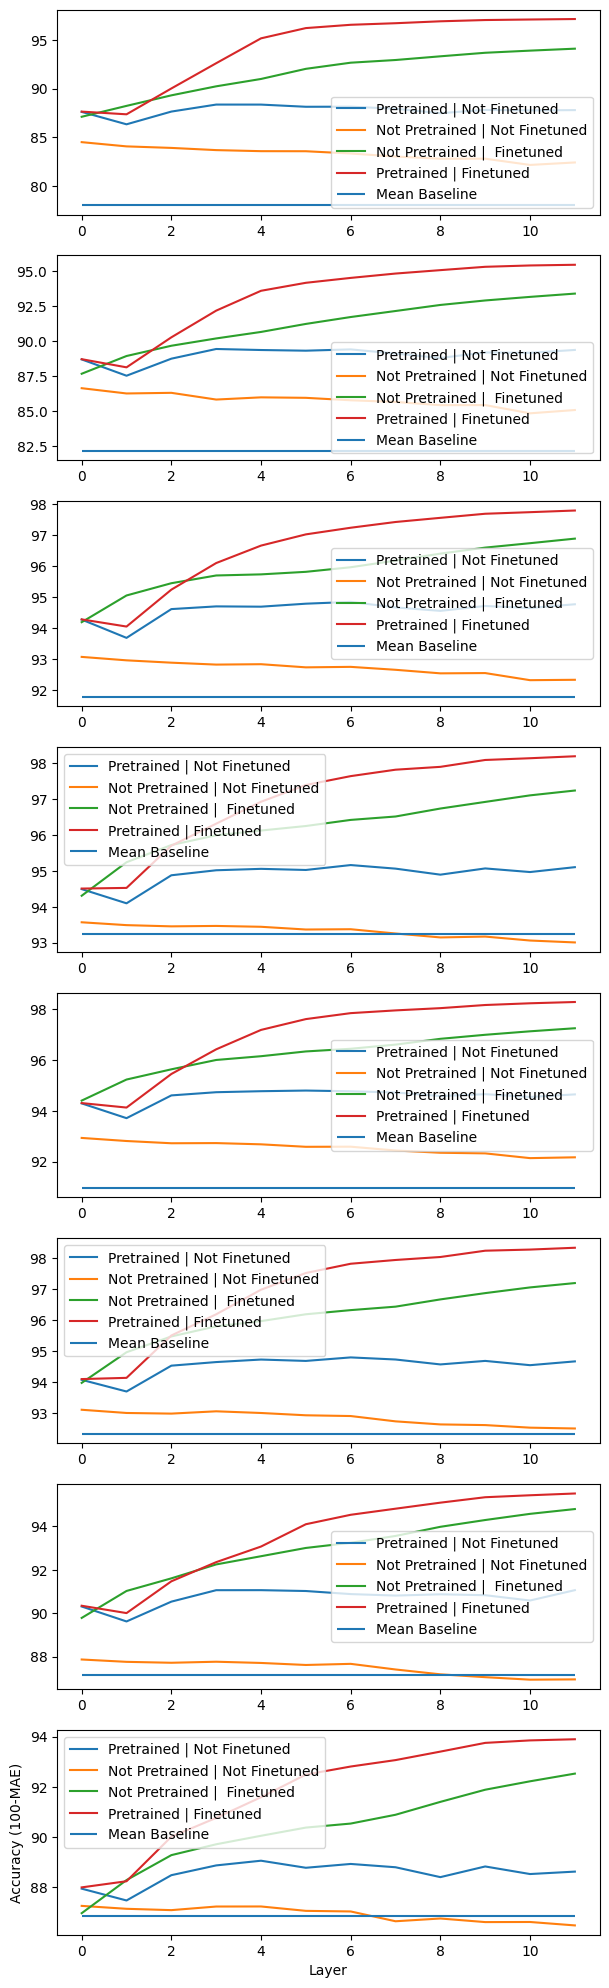

In [30]:
fig, axs = plt.subplots(8)
fig.set_size_inches(7, 25)

for i in range(8):

    axs[i].plot(100 - en_pretraining.values[i, :], label = "Pretrained | Not Finetuned")
    axs[i].plot(100 - en_notpretraining.values[i, :], label = "Not Pretrained | Not Finetuned")
    axs[i].plot(100 - en_notpretraining_fine.values[i, :], label = "Not Pretrained |  Finetuned")
    axs[i].plot(100 - en_pretraining_fine.values[i, :], label = "Pretrained | Finetuned")
    axs[i].hlines(100 - list(baseline_mae["mean_baseline_results_en_all"].values())[i], label = "Mean Baseline", xmin=0, xmax=11)
    axs[i].legend()
    
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

In [31]:
baseline_mae["mean_baseline_results_it_all"]

{'mae_loss0': 23.97426849941038,
 'mae_loss1': 16.707821252211083,
 'mae_loss2': 7.6369646180350825,
 'mae_loss3': 6.021733697855248,
 'mae_loss4': 7.362190102631191,
 'mae_loss5': 6.447346237470519,
 'mae_loss6': 19.871204304245282,
 'mae_loss7': 15.96175053434552,
 'mae_loss_all': 12.997909833800119}

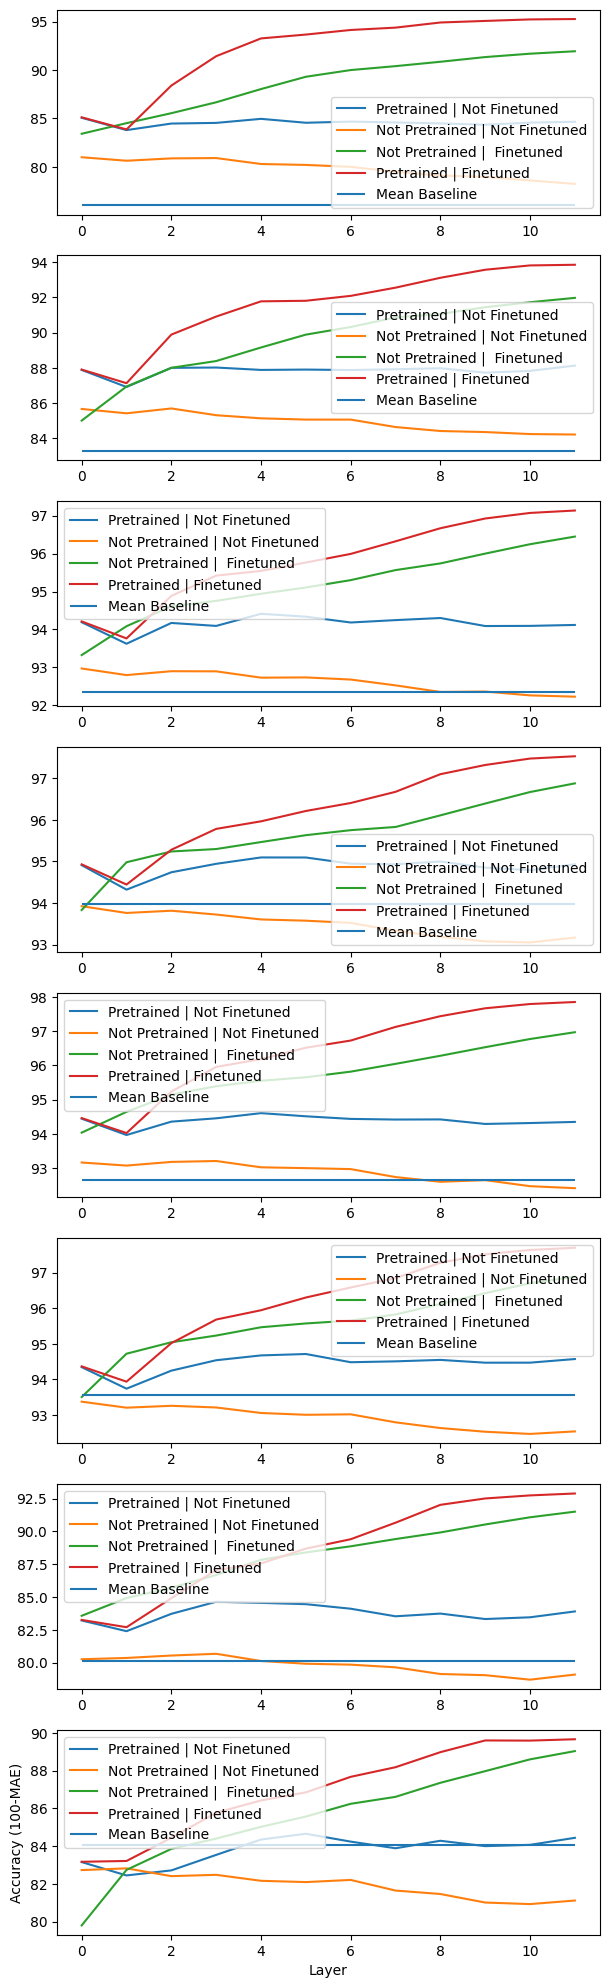

In [32]:
fig, axs = plt.subplots(8)
fig.set_size_inches(7, 25)

for i in range(8):
    # print(f"Feature {i}")
    axs[i].plot(100 - it_pretraining.values[i, :], label = "Pretrained | Not Finetuned")
    axs[i].plot(100 - it_notpretraining.values[i, :], label = "Not Pretrained | Not Finetuned")
    axs[i].plot(100 - it_notpretraining_fine.values[i, :], label = "Not Pretrained |  Finetuned")
    axs[i].plot(100 - it_pretraining_fine.values[i, :], label = "Pretrained | Finetuned")
    axs[i].hlines(100 - list(baseline_mae["mean_baseline_results_it_all"].values())[i], label = "Mean Baseline", xmin=0, xmax=11)
    axs[i].legend()
    # axs[i].xlabel("Layer")
    #axs[i].ylabel("AVG Accuracy (100-MAE)")

plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

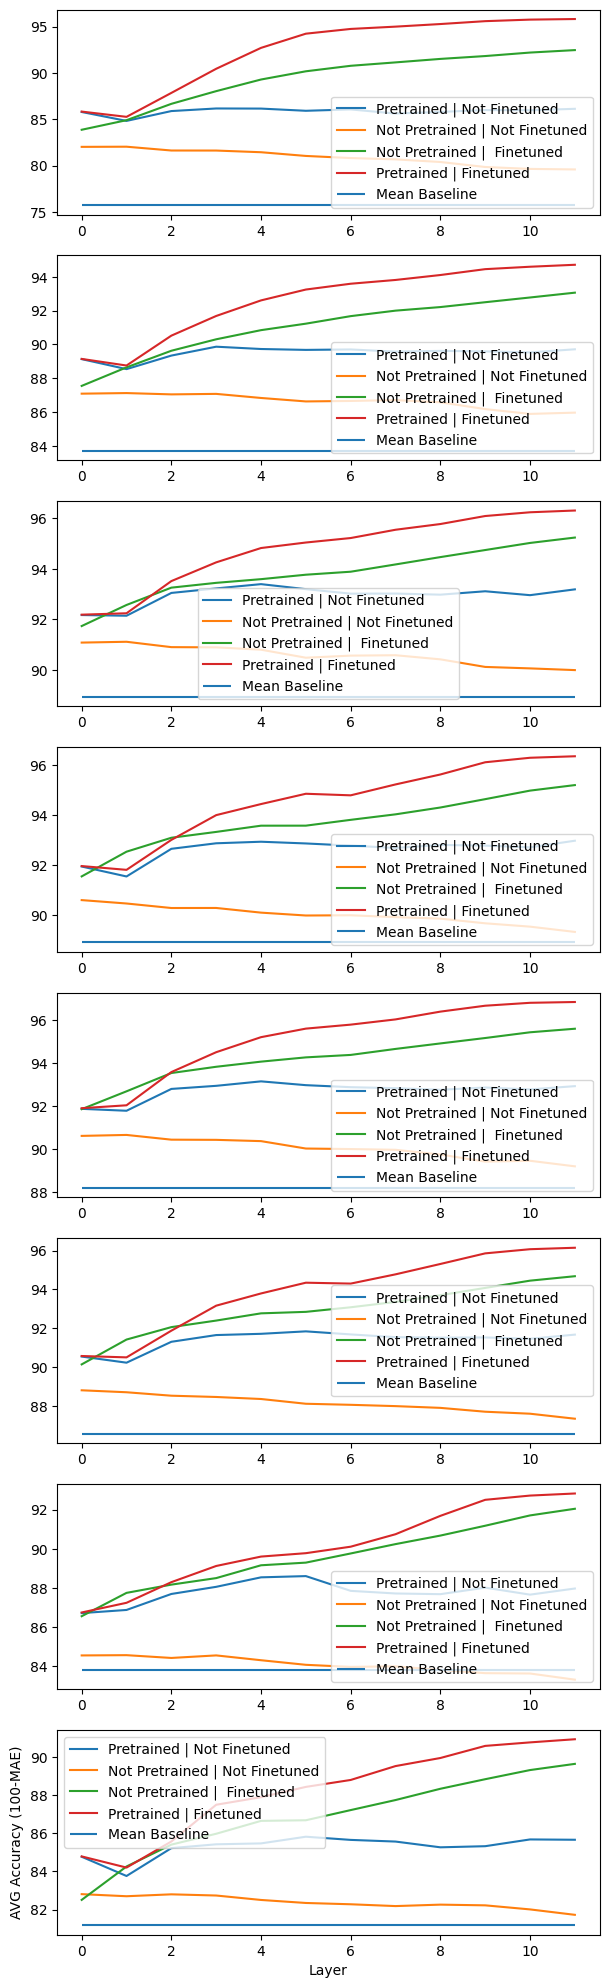

In [33]:
fig, axs = plt.subplots(8)
fig.set_size_inches(7, 25)

for i in range(8):
    axs[i].plot(100 - sp_pretraining.values[i, :], label = "Pretrained | Not Finetuned")
    axs[i].plot(100 - sp_notpretraining.values[i, :], label = "Not Pretrained | Not Finetuned")
    axs[i].plot(100 - sp_notpretraining_fine.values[i, :], label = "Not Pretrained |  Finetuned")
    axs[i].plot(100 - sp_pretraining_fine.values[i, :], label = "Pretrained | Finetuned")
    axs[i].hlines(100 - list(baseline_mae["mean_baseline_results_sp_all"].values())[i], label = "Mean Baseline", xmin=0, xmax=11)
    axs[i].legend()
    
plt.xlabel("Layer")
plt.ylabel("AVG Accuracy (100-MAE)")
plt.show()

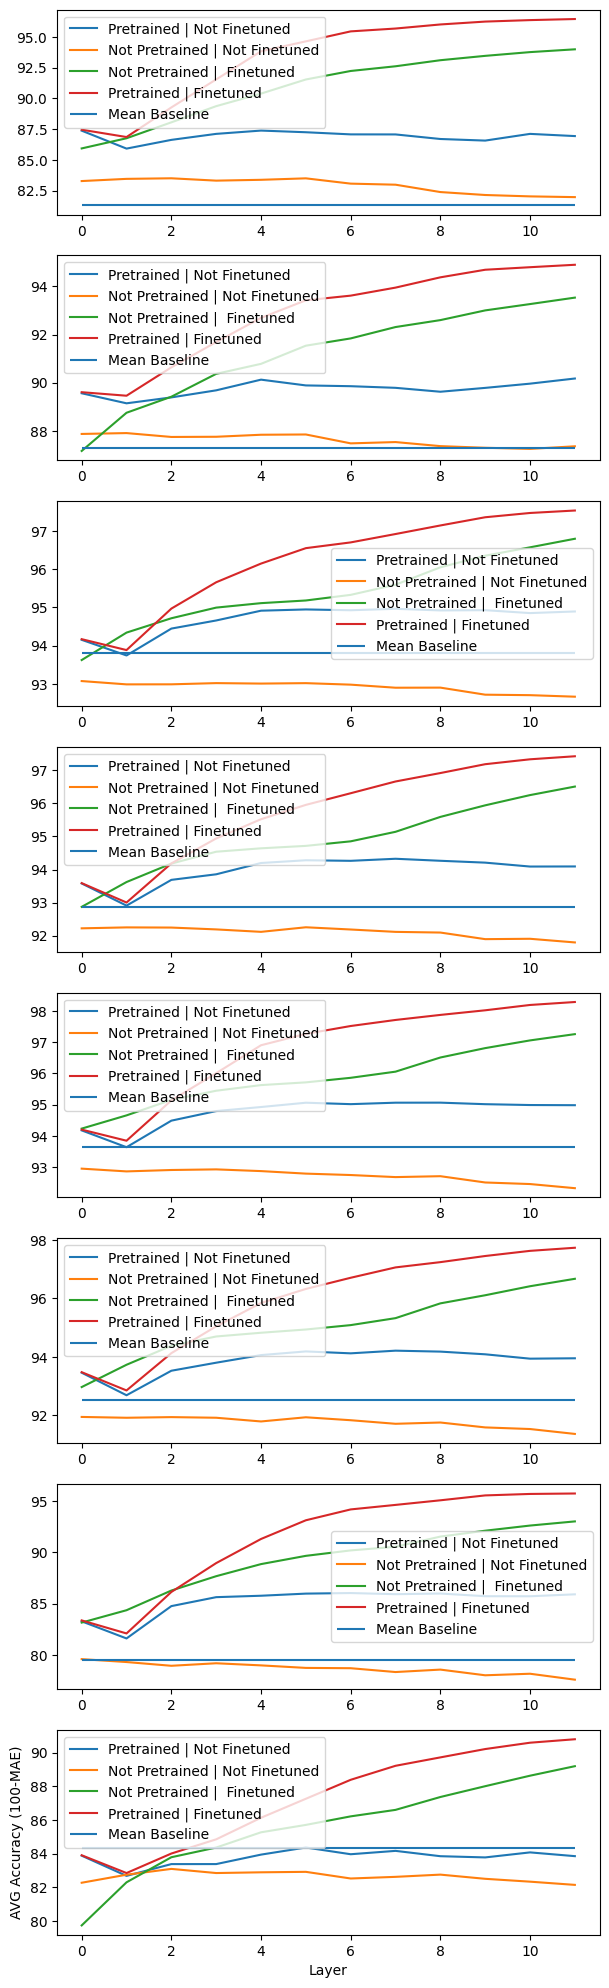

In [34]:
fig, axs = plt.subplots(8)
fig.set_size_inches(7, 25)

for i in range(8):
    axs[i].plot(100 - ge_pretraining.values[i, :], label = "Pretrained | Not Finetuned")
    axs[i].plot(100 - ge_notpretraining.values[i, :], label = "Not Pretrained | Not Finetuned")
    axs[i].plot(100 - ge_notpretraining_fine.values[i, :], label = "Not Pretrained |  Finetuned")
    axs[i].plot(100 - ge_pretraining_fine.values[i, :], label = "Pretrained | Finetuned")
    axs[i].hlines(100 - list(baseline_mae["mean_baseline_results_ge_all"].values())[i], label = "Mean Baseline", xmin=0, xmax=11)
    axs[i].legend()
    
plt.xlabel("Layer")
plt.ylabel("AVG Accuracy (100-MAE)")
plt.show()

### Plot mean curved

#### EN

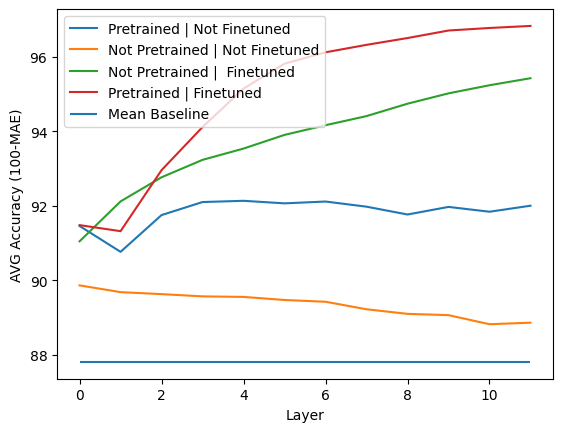

In [35]:
plt.plot(100 - np.mean(en_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(en_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(en_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(en_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_en_all"].values())[8], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Accuracy (100-MAE)")
plt.show()

#### IT

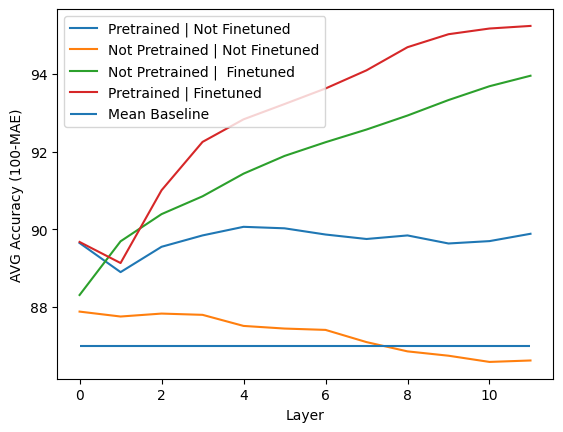

In [36]:
plt.plot(100 - np.mean(it_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(it_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(it_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(it_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_it_all"].values())[8], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Accuracy (100-MAE)")
plt.show()

#### SP

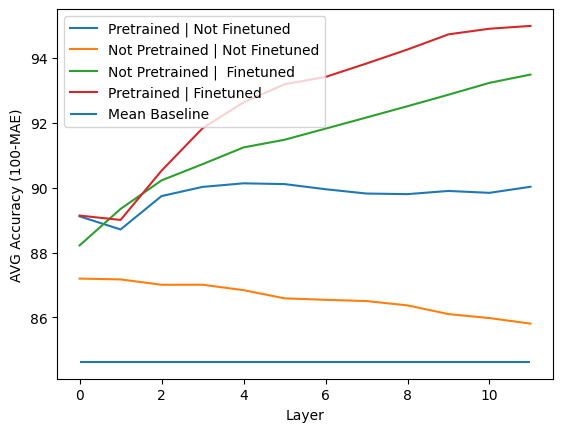

In [37]:
plt.plot(100 - np.mean(sp_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(sp_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(sp_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(sp_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_sp_all"].values())[8], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Accuracy (100-MAE)")
plt.show()

#### GE

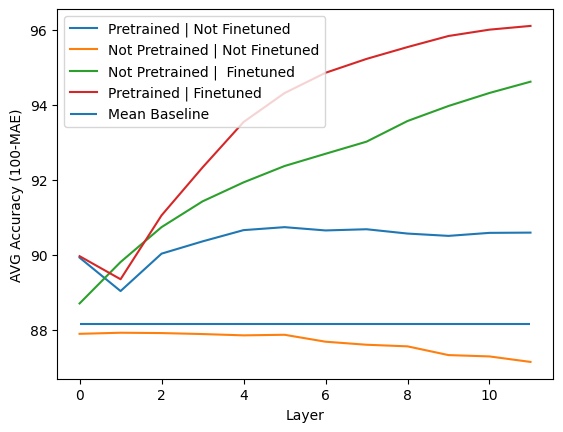

In [38]:
plt.plot(100 - np.mean(ge_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(ge_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(ge_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(ge_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_ge_all"].values())[8], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Accuracy (100-MAE)")
plt.show()

# DUR

### EN

In [39]:
en_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["en"]["notpretraining_dur"])
en_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["en"]["pretraining_dur"])
en_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["en"]["notpretraining_dur"])
en_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["en"]["pretraining_dur"])

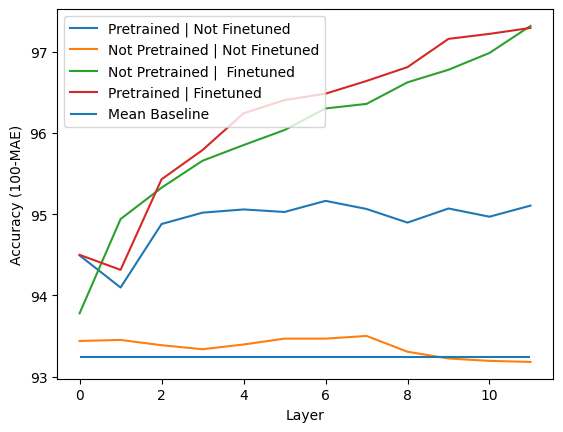

In [40]:
plt.plot(100 - np.mean(en_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(en_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(en_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(en_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_en_all"].values())[3], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

### IT

In [41]:
it_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["it"]["notpretraining_dur"])
it_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["it"]["pretraining_dur"])
it_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["it"]["notpretraining_dur"])
it_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["it"]["pretraining_dur"])

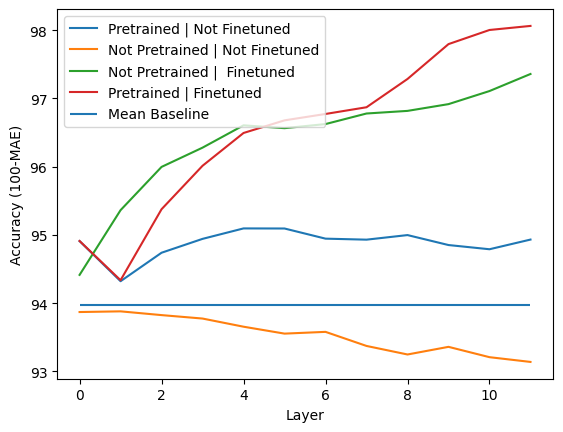

In [42]:
plt.plot(100 - np.mean(it_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(it_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(it_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(it_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_it_all"].values())[3], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

### SP

In [43]:
sp_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["sp"]["notpretraining_dur"])
sp_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["sp"]["pretraining_dur"])
sp_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["sp"]["notpretraining_dur"])
sp_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["sp"]["pretraining_dur"])

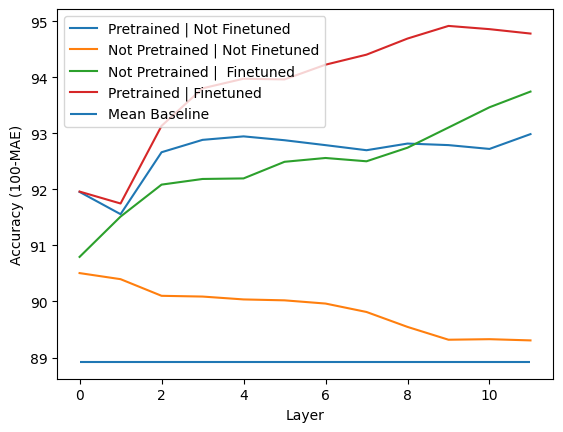

In [44]:
plt.plot(100 - np.mean(sp_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(sp_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(sp_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(sp_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_sp_all"].values())[3], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

### GE

In [45]:
ge_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["ge"]["notpretraining_dur"])
ge_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["ge"]["pretraining_dur"])
ge_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["ge"]["notpretraining_dur"])
ge_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["ge"]["pretraining_dur"])

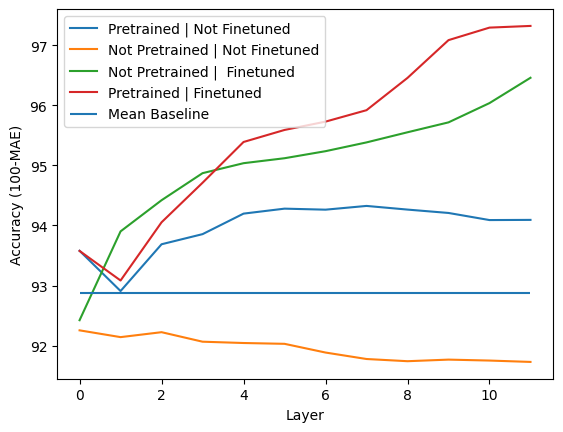

In [46]:
plt.plot(100 - np.mean(ge_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(ge_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(ge_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(ge_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_ge_all"].values())[3], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

# PROB_SKIP

### EN

In [47]:
en_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["en"]["notpretraining_prob_skip"])
en_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["en"]["pretraining_prob_skip"])
en_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["en"]["notpretraining_prob_skip"])
en_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["en"]["pretraining_prob_skip"])

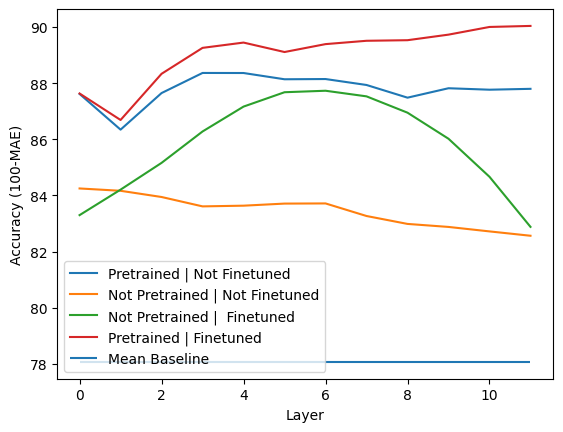

In [48]:
plt.plot(100 - np.mean(en_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(en_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(en_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(en_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_en_all"].values())[0], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

### IT

In [49]:
it_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["it"]["notpretraining_prob_skip"])
it_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["it"]["pretraining_prob_skip"])
it_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["it"]["notpretraining_prob_skip"])
it_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["it"]["pretraining_prob_skip"])

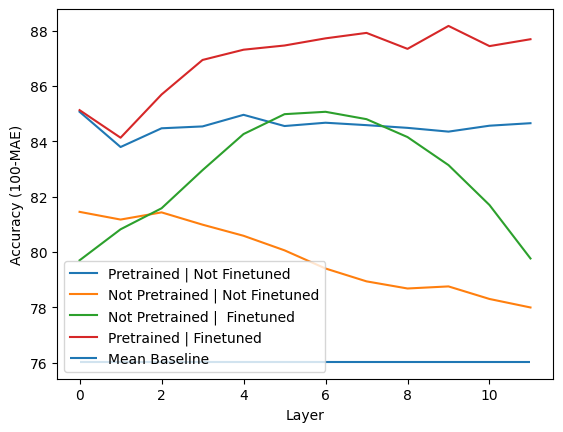

In [50]:
plt.plot(100 - np.mean(it_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(it_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(it_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(it_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_it_all"].values())[0], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

### SP

In [51]:
sp_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["sp"]["notpretraining_prob_skip"])
sp_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["sp"]["pretraining_prob_skip"])
sp_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["sp"]["notpretraining_prob_skip"])
sp_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["sp"]["pretraining_prob_skip"])

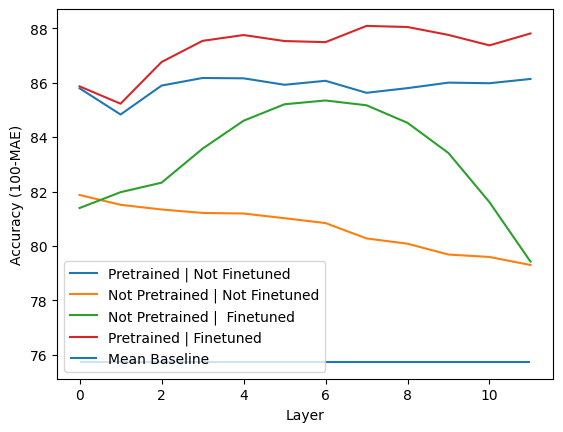

In [52]:
plt.plot(100 - np.mean(sp_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(sp_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(sp_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(sp_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_sp_all"].values())[0], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()

### GE

In [55]:
ge_notpretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["ge"]["notpretraining_prob_skip"])
ge_pretraining = pd.DataFrame.from_dict(collected_losses["notfinetuned"]["ge"]["pretraining_prob_skip"])
ge_notpretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["ge"]["notpretraining_prob_skip"])
ge_pretraining_fine = pd.DataFrame.from_dict(collected_losses["finetuned"]["ge"]["pretraining_prob_skip"])

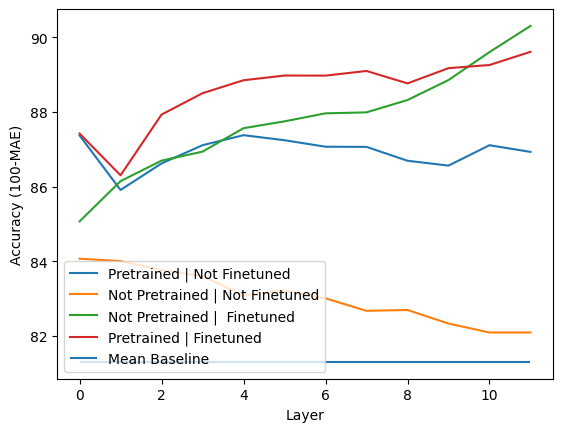

In [54]:
plt.plot(100 - np.mean(ge_pretraining.values, axis=0), label = "Pretrained | Not Finetuned")
plt.plot(100 - np.mean(ge_notpretraining.values, axis=0), label = "Not Pretrained | Not Finetuned")
plt.plot(100 - np.mean(ge_notpretraining_fine.values, axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(100 - np.mean(ge_pretraining_fine.values, axis=0), label = "Pretrained | Finetuned")
plt.hlines(100 - list(baseline_mae["mean_baseline_results_ge_all"].values())[0], label = "Mean Baseline", xmin=0, xmax=11)
plt.legend()
plt.xlabel("Layer")
plt.ylabel("Accuracy (100-MAE)")
plt.show()